In [1]:
pip install sscws

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.9/62.9 kB 3.0 MB/s eta 0:00:00


In [2]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from packaging import version

from sscws.sscws import SscWs
ssc = SscWs()

In [3]:
  result = ssc.get_observatories()
  for observatory in result['Observatory'][:5]:
      print('{:15s} {:20.20s} {:25s}'.format(observatory['Id'], observatory['Name'], observatory['StartTime'].isoformat()))
  print('...')

ace             ACE                  1997-08-25T17:48:00+00:00
active          Active               1989-09-29T00:00:00+00:00
aec             AE-C                 1973-12-17T08:01:00+00:00
aed             AE-D                 1975-10-17T00:00:00+00:00
aee             AE-E                 1975-11-20T21:04:00+00:00
...


In [4]:
result = ssc.get_ground_stations()
for ground_station in result['GroundStation'][:5]:
    location = ground_station['Location']
    print('{:5s} {:20.20s} {:7.2f} {:7.2f}'.format(ground_station['Id'], ground_station['Name'],location['Latitude'], location['Longitude']))
print('...')

SPA   South Pole            -89.99  -13.32
MCM   McMurdo               -77.85  166.70
SBF   Scott Base            -77.85  166.75
SPL   Siple                 -76.00  -84.00
HBA   Halley Bay            -75.52  -26.60
...


In [5]:
result = ssc.get_locations(['iss'],
                            ['2020-01-01T00:00:00Z',
                            '2020-01-01T01:00:00Z'])
data = result['Data'][0]
coords = data['Coordinates'][0]
print(coords['X'][:5])

[-1473.76002814 -1035.57214121  -592.61584877  -146.91796194
   299.48049963]


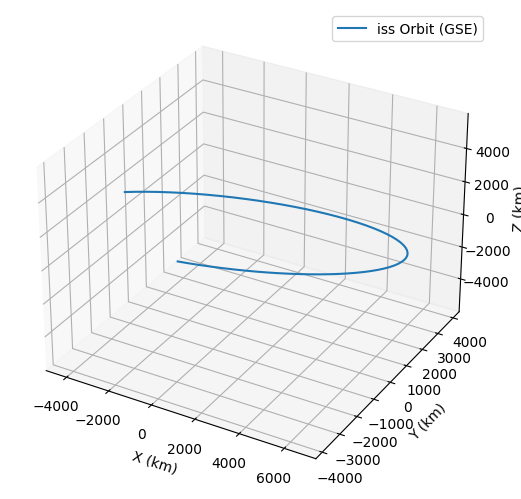

In [6]:
fig = plt.figure()
if version.parse(mpl.__version__) < version.parse('3.4'):
    ax = fig.gca(projection='3d')
else:
    ax = Axes3D(fig, auto_add_to_figure=False)
    fig.add_axes(ax)
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
title = data['Id'] + ' Orbit (' + \
        coords['CoordinateSystem'].value.upper() + ')'
ax.plot(coords['X'], coords['Y'], coords['Z'], label=title)
ax.legend()
plt.show()

Un ejercicio mas complejo

In [7]:
pip install -U sscws

In [8]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from packaging import version

from sscws.sscws import SscWs
ssc = SscWs()

In [9]:
result = ssc.get_observatories()
for observatory in result['Observatory'][:5]:
    print('{:15s} {:20.20s} {:25s}'.format(observatory['Id'], observatory['Name'], observatory['StartTime'].isoformat()))
print('...')

ace             ACE                  1997-08-25T17:48:00+00:00
active          Active               1989-09-29T00:00:00+00:00
aec             AE-C                 1973-12-17T08:01:00+00:00
aed             AE-D                 1975-10-17T00:00:00+00:00
aee             AE-E                 1975-11-20T21:04:00+00:00
...


In [10]:
result = ssc.get_ground_stations()
for ground_station in result['GroundStation'][:5]:
    location = ground_station['Location']
    print('{:5s} {:20.20s} {:7.2f} {:7.2f}'.format(ground_station['Id'], ground_station['Name'],location['Latitude'], location['Longitude']))
print('...')

SPA   South Pole            -89.99  -13.32
MCM   McMurdo               -77.85  166.70
SBF   Scott Base            -77.85  166.75
SPL   Siple                 -76.00  -84.00
HBA   Halley Bay            -75.52  -26.60
...
